# ***Task 1***

Create a graph using the networkX library to model a real-world network (e.g., a city's transportation network, a social network, or an Internet topology).

 The real network can be chosen at your discretion if you cannot come up with your network close to reality.



Visualize the created graph, and analyze the main characteristics (for example, the number of vertices and edges, the degree of vertices).

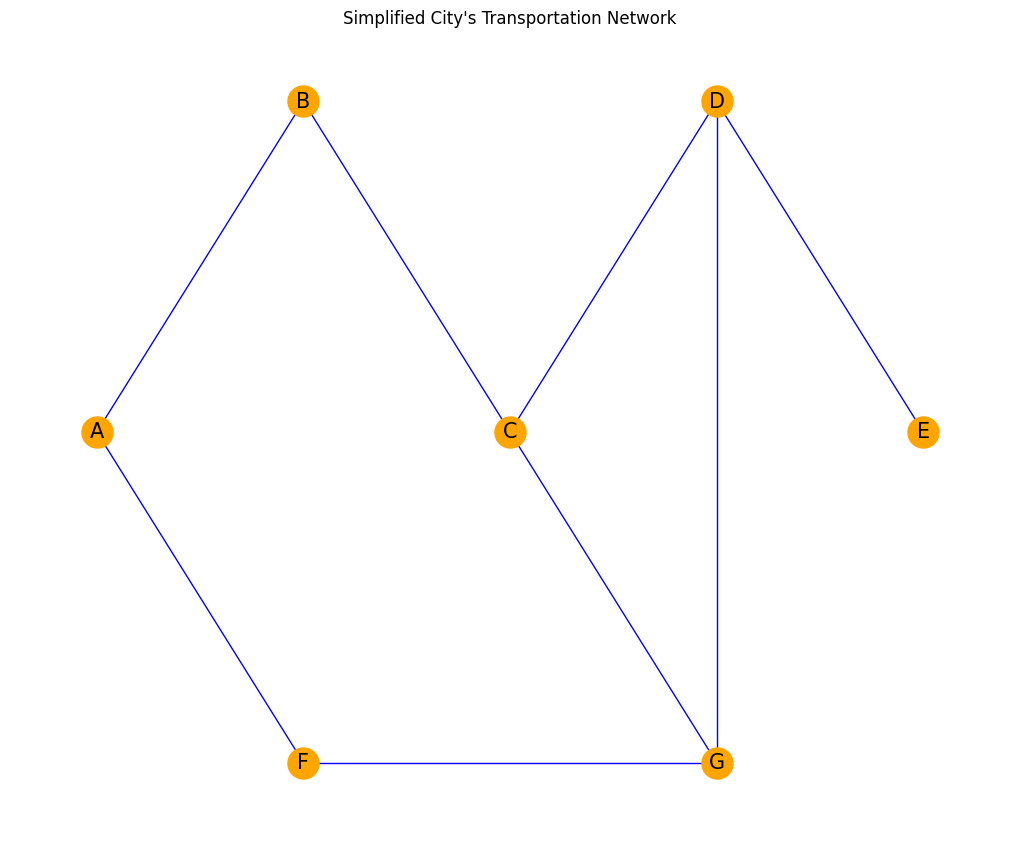

Number of vertices (stations): 7
Number of edges (connections): 8
Degree of each vertex (station):
A: 2
B: 2
C: 3
D: 3
E: 1
F: 2
G: 3


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add nodes with positions (optional)
metro_stations = {
    'A': (0, 0),
    'B': (1, 2),
    'C': (2, 0),
    'D': (3, 2),
    'E': (4, 0),
    'F': (1, -2),
    'G': (3, -2)
}

for metro_station, pos in metro_stations.items():
    G.add_node(metro_station, pos=pos)

# Add edges representing metro lines
edges = [
    ('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'),
    ('A', 'F'), ('F', 'G'), ('C', 'G'), ('G', 'D')
]

G.add_edges_from(edges)

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='orange', font_size=15, font_color='black', edge_color='blue')
plt.title("Simplified City's Transportation Network")
plt.show()

# Number of vertices (nodes)
num_vertices = G.number_of_nodes()

# Number of edges
num_edges = G.number_of_edges()

# Degree of vertices
degree_of_vertices = dict(G.degree())

print(f"Number of vertices (stations): {num_vertices}")
print(f"Number of edges (connections): {num_edges}")
print("Degree of each vertex (station):")
for vertex, degree in degree_of_vertices.items():
    print(f"{vertex}: {degree}")

# ***Task 2***

Write a program that uses the DFS and BFS algorithms to find paths in the graph that you developed in the first task.

Then compare the results of both algorithms for this graph, highlighting the difference in the paths obtained. Please explain why the paths for the algorithms are the way they are.

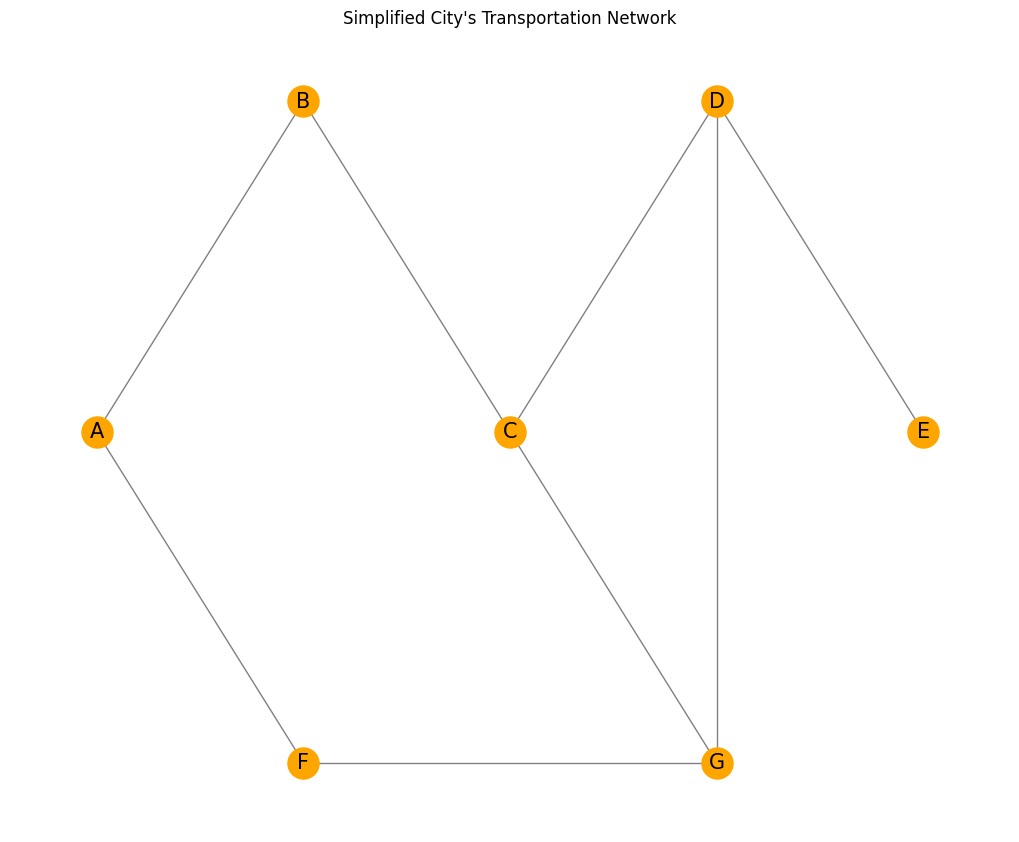

DFS path from A to E: ['A', 'B', 'C', 'D', 'E']
BFS path from A to E: ['A', 'B', 'C', 'D', 'E']


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Create a new graph
G = nx.Graph()

# Add nodes with positions (optional)
metro_stations = {
    'A': (0, 0),
    'B': (1, 2),
    'C': (2, 0),
    'D': (3, 2),
    'E': (4, 0),
    'F': (1, -2),
    'G': (3, -2)
}

for metro_station, pos in metro_stations.items():
    G.add_node(metro_station, pos=pos)

# Add edges representing metro lines
edges = [
    ('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'),
    ('A', 'F'), ('F', 'G'), ('C', 'G'), ('G', 'D')
]

G.add_edges_from(edges)

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='orange', font_size=15, font_color='black', edge_color='gray')
plt.title("Simplified City's Transportation Network")
plt.show()

# Adjacency list representation of the graph
graph = {
    'A': ['B', 'F'],
    'B': ['A', 'C'],
    'C': ['B', 'D', 'G'],
    'D': ['C', 'G', 'E'],
    'E': ['D'],
    'F': ['A', 'G'],
    'G': ['C', 'D', 'F']
}

# DFS algorithm
def dfs(graph, start, goal, path=None):
    if path is None:
        path = []
    path = path + [start]
    if start == goal:
        return path
    for node in graph[start]:
        if node not in path:
            newpath = dfs(graph, node, goal, path)
            if newpath:
                return newpath
    return None

# BFS algorithm
def bfs(graph, start, goal):
    queue = deque([[start]])
    seen = set([start])
    while queue:
        path = queue.popleft()
        node = path[-1]
        if node == goal:
            return path
        for neighbor in graph[node]:
            if neighbor not in seen:
                seen.add(neighbor)
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
    return None

# Finding paths
start_node = 'A'
end_node = 'E'

dfs_path = dfs(graph, start_node, end_node)
bfs_path = bfs(graph, start_node, end_node)

print(f"DFS path from {start_node} to {end_node}: {dfs_path}")
print(f"BFS path from {start_node} to {end_node}: {bfs_path}")

***Conclusions***

Comparison of DFS and BFS Results

Paths Obtained:

Depth-First Search (DFS):

Path from 'A' to 'E': ['A', 'B', 'C', 'D', 'E']

Breadth-First Search (BFS):
Path from 'A' to 'E': ['A', 'B', 'C', 'D', 'E']

**Analysis and Explanation:**

1. Depth-First Search (DFS):

Nature of DFS:

DFS explores as far as possible along each branch before backtracking. This means it will follow one path to its deepest node before considering alternative paths.

Path Explanation:

Starting from 'A', DFS first visits 'B' (the first neighbor of 'A'). From 'B', it proceeds to 'C' (the first neighbor of 'B' not yet visited). It continues to 'D' and then 'E'. This results in the path: ['A', 'B', 'C', 'D', 'E'].

In this specific graph, the path found by DFS is straightforward because there are no alternative branches that force backtracking before reaching 'E'.

2. Breadth-First Search (BFS):

Nature of BFS:

BFS explores all neighbors at the present depth before moving on to nodes at the next depth level. It systematically examines each level of the graph.

Path Explanation:

Starting from 'A', BFS first visits 'A's immediate neighbors, 'B' and 'F'. It then visits the neighbors of 'B' and 'F', which include 'C' and 'G'. Continuing this process, it eventually reaches 'D' and then 'E'. The path found is: ['A', 'B', 'C', 'D', 'E'].

BFS guarantees the shortest path in terms of the number of edges in unweighted graphs like this one. Since each edge represents a uniform step, the path: ['A', 'B', 'C', 'D', 'E'] is the shortest possible.

Differences in Pathfinding Approaches:

Exploration Strategy:

DFS is more "depth-oriented", diving deep into the graph along one branch before backtracking.
BFS is "breadth-oriented", examining all nodes at the current depth level before moving deeper.

Path Length:

In unweighted graphs, BFS always finds the shortest path (in terms of the number of edges). DFS does not guarantee this but often finds a valid path quickly.

Path Variability:

DFS paths can vary significantly based on the order of node exploration and the structure of the graph.
BFS paths are more consistent in finding the shortest path.

Why the Paths are Identical in This Case:

The paths from 'A' to 'E' are identical for both DFS and BFS due to the linearity of connections between nodes in this particular graph.
There are no alternative branches that would cause DFS to backtrack or BFS to take a different shortest path route. Both algorithms proceed straightforwardly through the nodes in the same sequence: ['A', 'B', 'C', 'D', 'E'].

**Conclusion:**

In this specific graph, both DFS and BFS yielded the same path from 'A' to 'E', but this may not always be the case in more complex networks with multiple branching paths.
Understanding the nature and strengths of each algorithm is crucial for selecting the appropriate pathfinding method in different graph structures and problem scenarios.

# ***Task 3***

Implement Dijkstra's algorithm to find the shortest path in the developed graph: add weights to the edges and find the shortest path between all graph vertices.

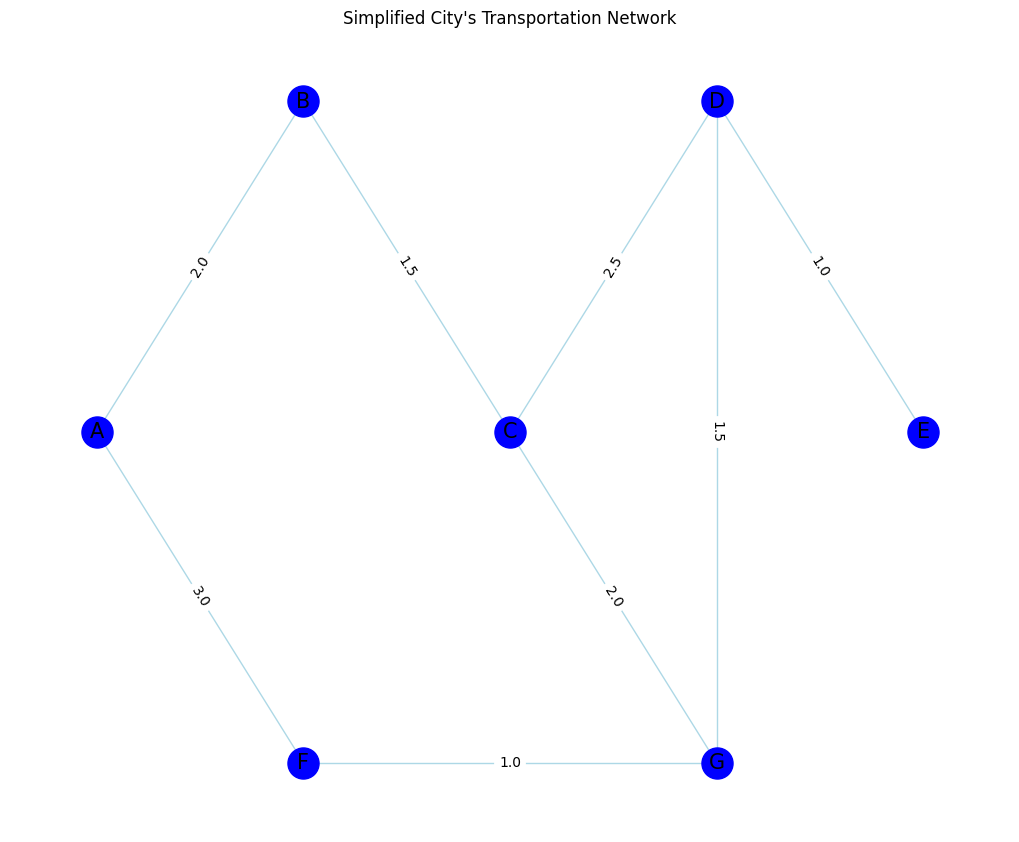

Shortest paths from A:
Distance to A: 0
Distance to B: 2.0
Distance to C: 3.5
Distance to D: 5.5
Distance to E: 6.5
Distance to F: 3.0
Distance to G: 4.0


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# Create a new graph
G = nx.Graph()

# Add nodes with positions (optional)
metro_stations = {
    'A': (0, 0),
    'B': (1, 2),
    'C': (2, 0),
    'D': (3, 2),
    'E': (4, 0),
    'F': (1, -2),
    'G': (3, -2)
}

for metro_station, pos in metro_stations.items():
    G.add_node(metro_station, pos=pos)

# Add edges with weights representing distances
edges = [
    ('A', 'B', 2.0), ('B', 'C', 1.5), ('C', 'D', 2.5), ('D', 'E', 1.0),
    ('A', 'F', 3.0), ('F', 'G', 1.0), ('C', 'G', 2.0), ('G', 'D', 1.5)
]

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph with weights
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='blue', font_size=15, font_color='black', edge_color='lightblue')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Simplified City's Transportation Network")
plt.show()

# Dijkstra's algorithm implementation
def dijkstra(graph, start):
    # Initialize distances and priority queue
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, attributes in graph[current_vertex].items():
            weight = attributes['weight']
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

# Convert the NetworkX graph to an adjacency list representation with weights
adjacency_list = {node: dict(neighbors) for node, neighbors in G.adjacency()}

# Find the shortest paths from node 'A'
start_node = 'A'
shortest_paths = dijkstra(adjacency_list, start_node)

print(f"Shortest paths from {start_node}:")
for destination, distance in shortest_paths.items():
    print(f"Distance to {destination}: {distance}")

The implementation of Dijkstra's algorithm on the graph representing the metro network provides the shortest paths from the starting node 'A' to all other nodes, demonstrating the algorithm's effectiveness in weighted graph pathfinding. The visualization of the graph with nodes, edges, and weights offers a clear and intuitive representation of the network's structure and distances. This approach highlights the utility of combining NetworkX for graph construction and Matplotlib for visualization with custom algorithm implementations for practical network analysis and optimization.